In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
ads = pd.read_csv("fbpac-ads-en-US.csv")

In [43]:
ads.isnull().sum()

id                                    0
html                                  0
political                             0
not_political                         0
title                                17
message                               0
thumbnail                             0
created_at                            0
updated_at                            0
lang                                  0
images                                0
impressions                           0
political_probability                 0
targeting                         11850
suppressed                            0
targets                            4207
advertiser                         3303
entities                           3666
page                               2549
lower_page                         2549
targetings                        13854
paid_for_by                       49931
targetedness                      15169
listbuilding_fundraising_proba     6070
dtype: int64

In [40]:
RAW_DF.iloc[0]

id                                                                    6115362188450
html                              <div class="_5pcr userContentWrapper"><div cla...
political                                                                         2
not_political                                                                     3
title                                                                 Free Together
message                           <p>How can we help military families and child...
thumbnail                         https://pp-facebook-ads.s3.amazonaws.com/v/t1....
created_at                                            2018-12-14 05:23:08.748706+00
updated_at                                            2019-02-16 19:20:13.644089+00
lang                                                                          en-US
images                            {https://pp-facebook-ads.s3.amazonaws.com/v/t4...
impressions                                                                 

In [44]:
ads.shape

(127267, 24)

In [45]:
# iterate through the rows 
# 把同樣的advertiser的廣告放到同類
advertisers = {}
for row in ads.itertuples():
    if(row.advertiser not in advertisers):
        advertisers[row.advertiser] = set()
    advertisers[row.advertiser].add(row.Index)

In [46]:
# iterate through the rows 
# 把同樣的paid_for_by(誰付的)的廣告放到同類
paidBy = {}
paidBy["no_info"] = set()
for row in ads.itertuples():
    if(not pd.isnull(row.paid_for_by) and row.paid_for_by not in paidBy):
        paidBy[row.paid_for_by] = set()
        paidBy[row.paid_for_by] = set()
    
    if(not pd.isnull(row.paid_for_by)):
        paidBy[row.paid_for_by].add(row.Index)
    else:
        paidBy["no_info"].add(row.Index)

In [314]:
import json
targets_to_segments = {}

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    for target in targets:
        target_value = target['target']
        if target_value not in targets_to_segments:
            targets_to_segments[target_value] = []
        if 'segment' in target:
            if target['segment'] not in targets_to_segments[target_value]:
                targets_to_segments[target_value].append(target['segment'])

In [315]:
targets_to_segments

{'Activity on the Facebook Family': [],
 'Age': ['18 and older',
  '40 and older',
  '21 and older',
  '18 to 34',
  '59 and older',
  '25 and older',
  '45 and older',
  '23 and older',
  '18 to 30',
  '24 and older',
  '35 and older',
  '30 and older',
  '25 to 60',
  '18 to 28',
  '55 and older',
  '18 to 35',
  '17 and older',
  '15 to 29',
  '20 and older',
  '50 and older',
  '22 and older',
  '18 to 62',
  '35 to 54',
  '25 to 55',
  '28 and older',
  '16 and older',
  '60 to 64',
  '65',
  '18 to 45',
  '44 to 48',
  '40 to 54',
  '20 to 49',
  '18 to 25',
  '34 to 49',
  '23 to 45',
  '18 to 55',
  '13 and older',
  '18',
  '18 to 39',
  '30 to 54',
  '18 to 50',
  '28 to 55',
  '18 to 24',
  '18 to 44',
  '18 to 59',
  '18 to 60',
  '45 to 54',
  '25 to 40',
  '55 to 64',
  '18 to 64',
  '35 and younger',
  '18 to 29',
  '18 to 49',
  '22 to 27',
  '28 to 33',
  '18 to 40',
  '26 and older',
  '18 to 54',
  '50 and younger',
  '50 to 64',
  '60 and older',
  '26 to 56',
  '20

In [67]:
states = {
"Alabama":"AL", "Alaska":"AK", "Arizona":"AZ", "Arkansas":"AR", "California":"CA", "Colorado":"CO", "Connecticut":"CT",
"Delaware":"DE", "Florida":"FL", "Georgia":"GA", "Hawaii":"HI", "Idaho":"ID", "Illinois":"IL", "Indiana":"IN", "Iowa":"IA",
"Kansas":"KS", "Kentucky":"KY", "Louisiana":"LA", "Maine":"ME", "Maryland":"MD", "Massachusetts":"MA", "Michigan":"MI", 
"Minnesota":"MN", "Mississippi":"MS", "Missouri":"MO", "Montana":"MT", "Nebraska":"NE", "Nevada":"NV", "New Hampshire":"NH",
"New Jersey":"NJ", "New Mexico":"NM", "New York":"NY", "North Carolina":"NC", "North Dakota":"ND", "Ohio":"OH", "Oklahoma":"OK",
"Oregon":"OR", "Pennsylvania":"PA", "Rhode Island":"RI", "South Carolina":"SC", "South Dakota":"SD", "Tennessee":"TN",
"Texas":"TX", "Utah":"UT", "Vermont":"VT", "Virginia":"VA", "Washington":"WA", "West Virginia":"WV", "Wisconsin":"WI", "Wyoming":"WY"
}
states_idx = {
"Alabama":0, "Alaska":1, "Arizona":2, "Arkansas":3, "California":4, "Colorado":5, "Connecticut":6,
"Delaware":7, "Florida":8, "Georgia":9, "Hawaii":10, "Idaho":11, "Illinois":12, "Indiana":13, "Iowa":14,
"Kansas":15, "Kentucky":16, "Louisiana":17, "Maine":18, "Maryland":19, "Massachusetts":20, "Michigan":21, 
"Minnesota":22, "Mississippi":23, "Missouri":24, "Montana":25, "Nebraska":26, "Nevada":27, "New Hampshire":28,
"New Jersey":29, "New Mexico":30, "New York":31, "North Carolina":32, "North Dakota":33, "Ohio":34, "Oklahoma":35,
"Oregon":36, "Pennsylvania":37, "Rhode Island":38, "South Carolina":39, "South Dakota":40, "Tennessee":41,
"Texas":42, "Utah":43, "Vermont":44, "Virginia":45, "Washington":46, "West Virginia":47, "Wisconsin":48, "Wyoming":49
}

In [123]:
# Import libraries
import pandas as pd
import folium
 
# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
state_geo = 'us-states.json'
 
# Load the unemployment value of each state
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
state_data = pd.read_csv('US_Unemployment_Oct2012.csv')
state_data['targetness'] = 0
state_data['num'] = 0
tmpLS = [0] * 50
targetness_new = pd.Series(tmpLS)
num_new = pd.Series(tmpLS) 

In [124]:
for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in states_idx):
                idx = states_idx[target['segment']]
                tmp = row[1]['targetedness']
                if(np.isnan(tmp)):
                    tmp = 0
                
                targetness_new[idx] = targetness_new[idx] + tmp
                num_new[idx] = num_new[idx] + 1

state_data.insert(2, "Total targetness", targetness_new) 
state_data.insert(3, "Total num", num_new) 
state_data.insert(4, "Average targetess", state_data["Total targetness"] / state_data["Total num"])

In [125]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'Average targetess'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Average Targetness'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#292_folium_chloropleth_USA1.html')


/anaconda3/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [126]:
m

In [128]:
for k in targets_to_segments:
    print(k)

Age
MinAge
Region
Activity on the Facebook Family
Retargeting
Interest
List
State
City
Like
Segment
MaxAge
Language
Website
Gender
Agency
Engaged with Content


In [129]:
targets_to_segments["Interest"]

['National Rifle Association',
 'Conservative talk radio',
 'American Civil Liberties Union',
 'Smoking',
 'Immigration',
 'Israel',
 'Barack Obama',
 'The Nature Conservancy',
 'Bernie Sanders',
 'Hillary Clinton',
 'Arab world',
 'Community issues',
 'Feminism',
 'Libertarian Party (United States)',
 'The Rachel Maddow Show',
 'Current events',
 'Amnesty International',
 'Democrats',
 'Dua',
 'Donald Trump',
 'Political corruption',
 'Dolphin',
 'Anti-discrimination',
 'Civil and political rights',
 'Social justice',
 'Crosswalk.com',
 'Walk with Jesus',
 'National Audubon Society',
 'The Washington Post',
 'Black Lives Matter',
 'Libertarianism',
 "Women's rights",
 'NutritionFacts.org',
 'Melania Trump',
 'Politics and social issues',
 'Education',
 'Environmental law',
 'Science',
 'Medicare (United States)',
 'Planned Parenthood',
 'Republican Party (United States)',
 'Telecommunication',
 'Law',
 'Sustainability',
 'Democratic Party (United States)',
 'Home improvement',
 'Frien

In [144]:
paidBy.keys()

dict_keys(['no_info', 'State Policy Network', '4Ocean, LLC', 'Union Gospel Mission Twin Cities', 'The Institute for Agriculture and Trade Policy', 'For Our Future Action Fund', 'the Virginia Transportation Construction Alliance', 'Define American', 'Alliance Defending Freedom', "the Progressive Change Campaign Committee PAC and not authorized by any candidate or candidate's committee. Contributions …", 'The Wilderness Society', 'Greenpeace USA', 'Amnesty International USA', 'FCTRY', 'Catholic Relief Services', 'Bill Nelson for U.S. Senate', 'Crooked Media', 'National Solar Rebate', 'Planned Parenthood Action Fund.', 'Secure Financial Advisory Group', 'UNICEF USA', 'World Food Program USA', 'Dissent Pins', 'Progress Michigan', "Swing Left. Not authorized by any candidate or candidate's committee.", "Time's Up Oakland", 'CRTV', 'the North Carolina Conservation Network', 'Center for Biological Diversity', 'JB for Governor', 'MontPIRG, Sophie Moon - Treasurer, 141 Corbin Hall - Missoula, M

In [ ]:
# the Trump Make America Great Again Committee
# Donald J. Trump for President, Inc.  v
# Trump Train News
# Your Trump Shop
# Donald J. Trump - online store for campaign gear
# The People's Trumpet LLC   v
# Trump White House Shop
# Donald Trump Collectables
# Oklahomans for Trump  v
# Donald J. Trump - 45th President v
# President Trump Fans Page
# Team Trump 2020 Merchandise

In [172]:
targets_to_segments_tmp = {}

for i in paidBy["Donald J. Trump for President, Inc."]:
    row = ads.iloc[i]
    try:
        targets = json.loads(row['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    for target in targets:
        target_value = target['target']
        if target_value not in targets_to_segments_tmp:
            targets_to_segments_tmp[target_value] = []
        if 'segment' in target:
            if target['segment'] not in targets_to_segments_tmp[target_value]:
                targets_to_segments_tmp[target_value].append(target['segment'])

In [313]:
targets_to_segments_tmp

{'Age': ['45 and older', '18 and older'],
 'MinAge': ['45', '18'],
 'Region': ['the United States'],
 'Segment': ['US politics (very liberal)',
  'US politics (liberal)',
  'US politics (moderate)'],
 'Website': ['people who have visited their website or used one of their apps']}

In [203]:
targets_to_segments_tmp = {}

for i in paidBy["The People's Trumpet LLC"]:
    row = ads.iloc[i]
    try:
        targets = json.loads(row['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    for target in targets:
        target_value = target['target']
        if target_value not in targets_to_segments_tmp:
            targets_to_segments_tmp[target_value] = []
        if 'segment' in target:
            if target['segment'] not in targets_to_segments_tmp[target_value]:
                targets_to_segments_tmp[target_value].append(target['segment'])

In [204]:
targets_to_segments_tmp

{'Age': ['45 and older', '18 and older'],
 'MinAge': ['45', '18'],
 'Region': ['the United States'],
 'Segment': ['US politics (very liberal)',
  'US politics (liberal)',
  'US politics (moderate)'],
 'Website': ['people who have visited their website or used one of their apps']}

In [211]:
tmpLS = [0] * 50
conservative_new = pd.Series(tmpLS)
conservative = {"US politics (very conservative)", "US politics (conservative)"}
liberal = {"US politics (very liberal)", "US politics (liberal)"}

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in conservative):
                hasPolitical = True
                break
    
    if(hasPolitical):
        for target in targets:
            if 'segment' in target.keys():
                if(target['segment'] in states_idx):
                    idx = states_idx[target['segment']]
                    conservative_new[idx] = conservative_new[idx] + 1

state_data.insert(5, "conservative Ads", conservative_new)

In [213]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'conservative Ads'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of targeted conservative ads'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#conservative_ads.html')

/anaconda3/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [214]:
#swing state
m

In [215]:
liberal = {"US politics (very liberal)", "US politics (liberal)"}
liberal_new = pd.Series(tmpLS)

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in liberal):
                hasPolitical = True
                break
    
    if(hasPolitical):
        for target in targets:
            if 'segment' in target.keys():
                if(target['segment'] in states_idx):
                    idx = states_idx[target['segment']]
                    liberal_new[idx] = liberal_new[idx] + 1

state_data.insert(6, "liberal Ads", liberal_new)

In [217]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'liberal Ads'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of targeted liberal ads'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#liberal_ads.html')

/anaconda3/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [218]:
m

In [ ]:
# Donald Trump Dog Poop Bags
# Define American
# Asian Americans Against Trumpism PAC. Not authorized by any candidate or candidate’s committee.

In [ ]:
# divide into two groups: conservative / liberal
# arkansas 

In [230]:
# Republican Party (United States), Democratic Party (United States)
tmpLS = [0] * 50
republican_new, democratic_new = pd.Series(tmpLS), pd.Series(tmpLS)
repub, demo = {"Republican Party (United States)"}, {"Democratic Party (United States)"}

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in repub):
                hasPolitical = True
                break
    
    if(hasPolitical):
        for target in targets:
            if 'segment' in target.keys():
                if(target['segment'] in states_idx):
                    idx = states_idx[target['segment']]
                    republican_new[idx] = republican_new[idx] + 1

state_data.insert(7, "republican Ads", republican_new)

ValueError: cannot insert republican Ads, already exists

In [231]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'republican Ads'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of targeted republican ads'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#republican_ads.html')

/anaconda3/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [232]:
m

In [226]:
for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False 
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in demo):
                hasPolitical = True
                break
    
    if(hasPolitical):
        for target in targets:
            if 'segment' in target.keys():
                if(target['segment'] in states_idx):
                    idx = states_idx[target['segment']]
                    democratic_new[idx] = democratic_new[idx] + 1

state_data.insert(8, "democratic Ads", democratic_new)

In [233]:
# Initialize the map:
m = folium.Map(location=[37, -102], zoom_start=5)
 
# Add the color for the chloropleth:
m.choropleth(
 geo_data=state_geo,
 name='choropleth',
 data=state_data,
 columns=['State', 'democratic Ads'],
 key_on='feature.id',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.2,
 legend_name='Number of targeted democratic ads'
)
folium.LayerControl().add_to(m)
 
# Save to html
m.save('#democratic_ads.html')

/anaconda3/lib/python3.6/site-packages/folium/folium.py:426: FutureWarning:

The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.



In [234]:
m

In [ ]:
# run topic model on different interests 

In [275]:
trump = {"Melania Trump", "Donald Trump Jr.", "Donald Trump for President", "Ivanka Trump", "Eric Trump"}
hillary = {"Hillary Clinton", "Bill Clinton"}
num, location = 0, 0
for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in hillary):
                num = num + 1
                #print(targets)
                hasPolitical = True
                break
    
    if(hasPolitical):
        for target in targets:
            if 'segment' in target.keys():
                if(target['segment'] in states_idx):
                    location = location + 1

print(location / num)    

0.4230769230769231


In [329]:
interests = {}
for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in targets_to_segments["Interest"] and target['segment'] not in states and target['segment'] not in targets_to_segments['City']):
                if(row[1]['political'] > 0):
                    if(target['segment'] not in interests):
                        interests[target['segment']] = 0
                    interests[target['segment']] = interests[target['segment']] + 1

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



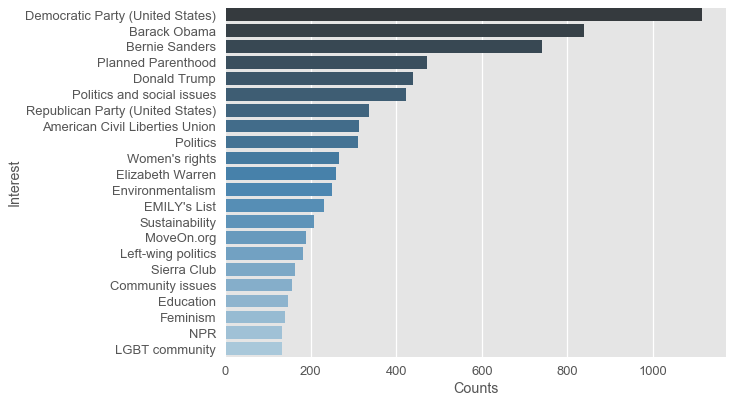

In [330]:
top_interests = pd.DataFrame(interests.items(), columns=['Interest', 'Counts'])
#top_interests_ls = top_interests['Interest'].value_counts()[:20]
top_interests = top_interests.sort_values(by=['Counts'], ascending=False)[:22]

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.style as style
import seaborn as sns
sns.set()

style.use('ggplot')
sns.set_context('talk')
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(y='Interest',x='Counts',data=top_interests,palette=("Blues_d"))
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



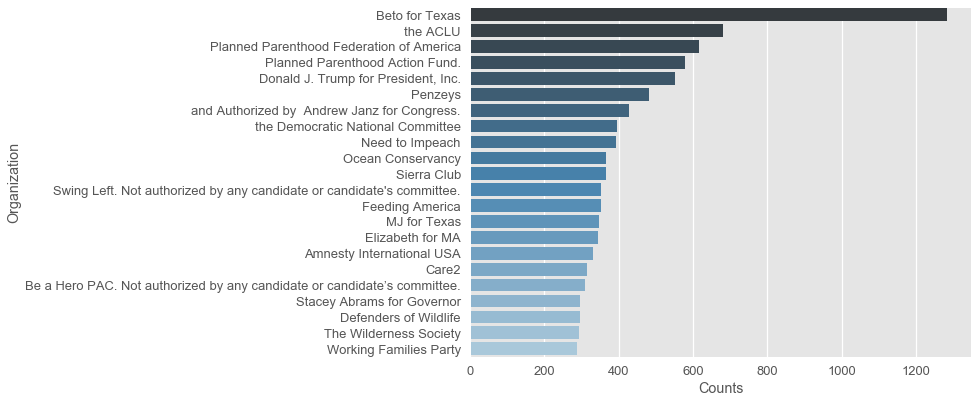

In [340]:
paidBy_num = {}
for row in ads.iterrows():
    if(row[1]['political'] > 0 and not pd.isnull(row[1]['paid_for_by'])):
        if(row[1]['paid_for_by'] not in paidBy_num):
            paidBy_num[row[1]['paid_for_by']] = 0
        
        paidBy_num[row[1]['paid_for_by']] = paidBy_num[row[1]['paid_for_by']] + 1

top_paidBy = pd.DataFrame(paidBy_num.items(), columns=['Organization', 'Counts'])
#top_interests_ls = top_interests['Interest'].value_counts()[:20]
top_paidBy = top_paidBy.sort_values(by=['Counts'], ascending=False)[:22]

style.use('ggplot')
sns.set_context('talk')
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(y='Organization',x='Counts',data=top_paidBy,palette=("Blues_d"))
plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



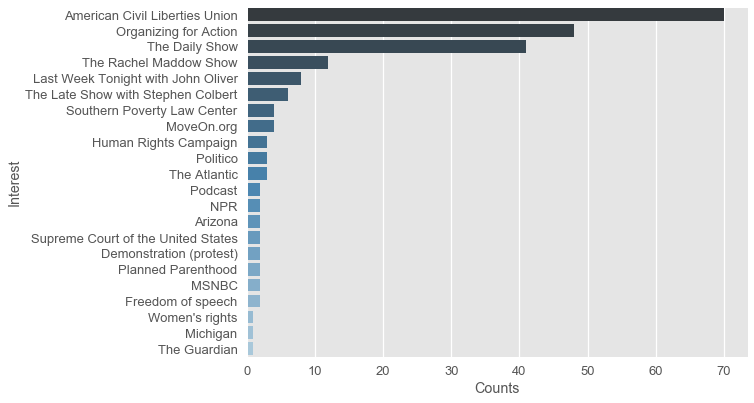

In [348]:
aclu_interest = {}

for row in ads.iterrows():
    if(row[1]['political'] > 0):
        if(row[1]['paid_for_by'] == 'the ACLU'):
            try:
                targets = json.loads(row[1]['targets'])
            except TypeError:
                # Ignore an value we can't parse as json (prob some variant of NULL)
                pass
            
            for target in targets:
                if 'segment' in target.keys():
                    if(target['target'] == 'Interest'):
                        if(target['segment'] not in aclu_interest):
                            aclu_interest[target['segment']] = 0
                        
                        aclu_interest[target['segment']] = aclu_interest[target['segment']] + 1

top_aclu_interests = pd.DataFrame(aclu_interest.items(), columns=['Interest', 'Counts'])
top_aclu_interests = top_aclu_interests.sort_values(by=['Counts'], ascending=False)[:22]
style.use('ggplot')
sns.set_context('talk')
dims = (8, 6)
fig, ax = plt.subplots(figsize=dims)
sns.barplot(y='Interest',x='Counts',data=top_aclu_interests,palette=("Blues_d"))
plt.show()

In [350]:
for row in ads.iterrows():
    if(row[1]['political'] > 0):
        if(row[1]['paid_for_by'] == 'Planned Parenthood Federation of America'):
            print(row[1]['targets'])

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "25 to 40"}, {"target": "MinAge", "segment": "25"}, {"target": "MaxAge", "segment": "40"}, {"target": "Interest", "segment": "Women's rights"}, {"target": "Region", "segment": "the United States"}, 

[{"target": "Age", "segment": "18 to 40"}, {"target": "MinAge", "segment": "18"}, {"target": "MaxAge", "segment": "40"}, {"target": "Interest", "segment": "Health care"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": 

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Planned Parenthood"}, {"target": "Region", "segment": "the United States"}]
nan
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Barack Obama"}, {"target": "Interest", "segment": "Bernie Sanders"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "s

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be simil

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "Min

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Slate (magazine)"}, {"target": "Interest", "segment": "Teen Vogue"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "55 and older"}, {"target": "MinAge", "segment": "55"}, {"target": "Interest", "segment": "Planned Parenthood"}, {"target": "Region", "segment": "the United State

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", 

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Slate (magazine)"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "25 to 40"}, {"target": "MinAge", "segment": "25"}, {"target": "MaxAge", "segment": "40"}, {"target": "Interest", "segment": "Women's rights"}, {"target": "Region", "segment": "the United States"}, {"target": "Gender", "segment": "women"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Slate (magazine)"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people 

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "55 and older"}, {"target": "MinAge", "segment": "55"}, {"target": "Interest", "segment": "Planned Parenthood"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "Elizabeth Warren"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "Min

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Interest", "segment": "EMILY's List"}, {"target": "Interest", "segment": "National Women's Law Center"}, {"target": "Region", "segment": "the United States"}]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "peop

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Website", "segment": "people who have visited their website or used one of their apps"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people w

[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Region", "segment": "the United States"}, {"target": "List"}]
[{"target": "Age", "segment": "18 and older"}, {"target": "MinAge", "segment": "18"}, {"target": "Retargeting", "segment": "people who may be similar to their customers"}, {"target": "Region", "segment": "the United States"}]
[]
[{"target": "Age", "segment": "18 and older"}, {"target": "Min

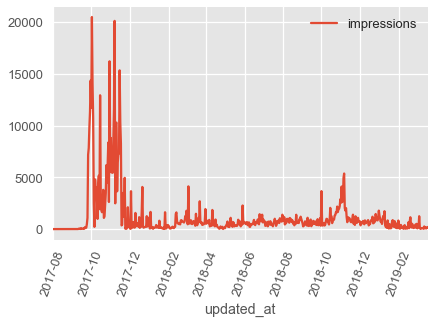

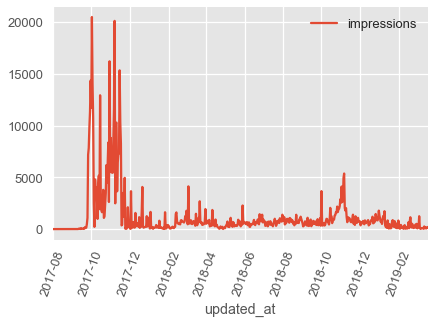

In [354]:
df_expanded_ts = ads[['impressions','updated_at']].copy()
df_expanded_ts.updated_at = pd.to_datetime(df_expanded_ts.updated_at)
df_expanded_ts.updated_at = df_expanded_ts.updated_at.dt.date
df_expanded_ts = df_expanded_ts.groupby(['updated_at']).sum()
df_expanded_ts.plot(rot=70)
plt.show()

In [355]:
from bs4 import BeautifulSoup

In [357]:
ads.message
ads['message_clean'] = ads.message.apply(lambda x: BeautifulSoup(x, "lxml").text)

In [363]:
from nltk.corpus import stopwords
import nltk
stop = stopwords.words('english')

In [364]:
ads['message_clean'] = ads.message_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [367]:
from nltk.corpus import wordnet as wn
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [369]:
import string
punctuations = string.punctuation
punctuations = punctuations + '–'
def token_and_lemma_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [tok for tok in tokens if tok not in stop]
    tokens = [tok for tok in tokens if tok.isalpha()]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [373]:
# Additional cleaning for tokenization using spacy
import spacy
from spacy.lang.en import English
parser = English()
def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


In [374]:
messages_lda = ads['message_clean'].apply(lambda x: token_and_lemma_text_for_lda(x))

In [377]:
type(messages_lda)

pandas.core.series.Series

In [381]:
from gensim import corpora
dictionary = corpora.Dictionary(messages_lda)
corpus = [dictionary.doc2bow(text) for text in messages_lda]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [422]:
conservative = {"US politics (very conservative)", "US politics (conservative)", "Republican Party (United States)"}
con = []

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in conservative):
                hasPolitical = True
                con.append(ads['message_clean'][row[0]])
                break

In [423]:
con_series = pd.Series(np.array(con))

In [424]:
con_lda = con_series.apply(lambda x: token_and_lemma_text_for_lda(x))

In [426]:
from gensim import corpora
dictionary_con = corpora.Dictionary(con_lda)
corpus_con = [dictionary_con.doc2bow(text) for text in con_lda]
import pickle
pickle.dump(corpus_con, open('corpus.pkl', 'wb'))
dictionary_con.save('dictionary.gensim')

In [429]:
NUM_TOPICS = 1
ldamodel_con = gensim.models.ldamodel.LdaModel(corpus_con, num_topics = NUM_TOPICS, id2word=dictionary_con, passes=15)
ldamodel_con.save('model5.gensim')

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1101: RuntimeWarning:

invalid value encountered in double_scalars



In [430]:
topics = ldamodel_con.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.015*"vote" + 0.006*"trump" + 0.006*"tax" + 0.006*"republican" + 0.006*"state" + 0.005*"like" + 0.005*"support" + 0.005*"president" + 0.005*"right" + 0.005*"november"')


In [431]:
liberal = {"US politics (very liberal)", "US politics (liberal)", "Democratic Party (United States)"}
lib = []

for row in ads.iterrows():
    try:
        targets = json.loads(row[1]['targets'])
    except TypeError:
        # Ignore an value we can't parse as json (prob some variant of NULL)
        pass
    
    hasPolitical = False
    for target in targets:
        if 'segment' in target.keys():
            if(target['segment'] in liberal):
                hasPolitical = True
                lib.append(ads['message_clean'][row[0]])
                break

In [432]:
lib_series = pd.Series(np.array(lib))
lib_lda = lib_series.apply(lambda x: token_and_lemma_text_for_lda(x))

In [434]:
from gensim import corpora
dictionary_lib = corpora.Dictionary(lib_lda)
corpus_lib = [dictionary.doc2bow(text) for text in lib_lda]
import pickle
pickle.dump(corpus_lib, open('corpus.pkl', 'wb'))
dictionary_lib.save('dictionary.gensim')

In [435]:
NUM_TOPICS = 1
ldamodel_lib = gensim.models.ldamodel.LdaModel(corpus_lib, num_topics = NUM_TOPICS, id2word=dictionary_lib, passes=15)
ldamodel_lib.save('model5.gensim')

/anaconda3/lib/python3.6/site-packages/gensim/models/ldamodel.py:1101: RuntimeWarning:

invalid value encountered in double_scalars



In [436]:
topics = ldamodel_lib.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.010*"establishment" + 0.009*"vote" + 0.008*"us" + 0.008*"help" + 0.008*"need" + 0.006*"right" + 0.006*"fight" + 0.006*"change" + 0.006*"win" + 0.005*"election"')


In [ ]:
# https://github.com/philiplbean/facebook_political_ads/blob/master/Political_Ads_Investigation.ipynb
# https://github.com/rji-futures-lab/fb-pol-ads/blob/master/Examining-FB-Pol-Ads.ipynb